# 토픽 모델링(Topic Modeling)

* 토픽 모델링은 문서 집합에서 주제를 찾아내기 위한 기술
* 토픽 모델링은 '특정 주제에 관한 문서에서는 특정 단어가 자주 등장할 것이다'라는 직관을 기반
* 예를 들어, 주제가 '개'인 문서에서는 개의 품종, 개의 특성을 나타내는 단어가 다른 문서에 비해 많이 등장
* 주로 사용되는 토픽 모델링 방법은 잠재 의미 분석과 잠재 디리클레 할당 기법이 있음

## 잠재 의미 분석(Latent Semantic Analysis)

* 잠재 의미 분석(LSA)은 주로 문서 색인의 의미 검색에 사용
* 잠재 의미 인덱싱(Latent Semantic Indexing, LSI)로도 알려져 있음
* LSA의 목표는 문서와 단어의 기반이 되는 잠재적인 토픽을 발견하는 것
* 잠재적인 토픽은 문서에 있는 단어들의 분포를 주도한다고 가정

* LSA 방법
  + 문서 모음에서 생성한 문서-단어 행렬(Document Term Matrix)에서 단어-토픽 행렬(Term-Topic Matrix)과 토픽-중요도 행렬(Topic-Importance Matrix), 그리고 토픽-문서 행렬(Topic-Document Matrix)로 분해

## 잠재 디리클레 할당(Latent Dirichlet Allocation)

* 잠재 디레클레 할당(LDA)은 대표적인 토픽 모델링  알고리즘 중 하나

* 잠재 디레클레 할당 방법
  1. 사용자가 토픽이 개수를 지정해 알고리즘에 전달
  2. 모든 단어들을 토픽 중 하나에 할당
  3. 모든 문서의 모든 단어에 대해 단어 w가 가정에 의거, $p(t|d)$, $p(w|t)$에 따라 토픽을 재할당, 이를 반복, 이 때 가정은 자신만이 잘못된 토픽에 할당되어 있고 다른 모든 단어는 올바른 토픽에 할당된다는 것을 의미    

* $p(t|d)$ - 문서 d의 단어들 중 토픽 t에 해당하는 비율
* 해당 문서의 자주 등장하는 다른 단어의 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미    

* $p(w|t)$- 단어 w를 가지고 있는 모든 문서들 중  토픽 t가 할당된 비율
* 다른 문서에서 단어 w에 많이 할당된 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미

## 데이터 준비

In [1]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle = True, random_state=1,
                             remove = ('headers','footers','quotes'))
documents = dataset.data

print(len(documents))
documents[3]

11314


'Notwithstanding all the legitimate fuss about this proposal, how much\nof a change is it?  ATT\'s last product in this area (a) was priced over\n$1000, as I suspect \'clipper\' phones will be; (b) came to the customer \nwith the key automatically preregistered with government authorities. Thus,\naside from attempting to further legitimize and solidify the fed\'s posture,\nClipper seems to be "more of the same", rather than a new direction.\n   Yes, technology will eventually drive the cost down and thereby promote\nmore widespread use- but at present, the man on the street is not going\nto purchase a $1000 crypto telephone, especially when the guy on the other\nend probably doesn\'t have one anyway.  Am I missing something?\n   The real question is what the gov will do in a year or two when air-\ntight voice privacy on a phone line is as close as your nearest pc.  That\nhas got to a problematic scenario for them, even if the extent of usage\nnever surpasses the \'underground\' stature

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.parsing.preprocessing import preprocess_string

nltk.download('stopwords')

def clean_text(d):
  pattern = r'[^a-zA-Z\s]'
  text = re.sub(pattern, '', d)
  return d

def clean_stopword(d):
  stop_words = stopwords.words('english')
  return ' '.join([w.lower() for w in d.split() if w not in stop_words and len(w) > 3])

def preprocessing(d):
  return preprocess_string(d)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
import pandas as pd

news_df = pd.DataFrame({'article' : documents})
len(news_df)

11314

In [4]:
news_df.replace("",float("NaN"), inplace=True)
news_df.dropna(inplace=True)
print(len(news_df))

11096


In [5]:
news_df['article'] = news_df['article'].apply(clean_text)
news_df['article']

0        Well i'm not sure about the story nad it did s...
1        \n\n\n\n\n\n\nYeah, do you expect people to re...
2        Although I realize that principle is not one o...
3        Notwithstanding all the legitimate fuss about ...
4        Well, I will have to change the scoring on my ...
                               ...                        
11309    Danny Rubenstein, an Israeli journalist, will ...
11310                                                   \n
11311    \nI agree.  Home runs off Clemens are always m...
11312    I used HP DeskJet with Orange Micros Grappler ...
11313                                          ^^^^^^\n...
Name: article, Length: 11096, dtype: object

In [6]:
news_df['article'] = news_df['article'].apply(clean_stopword)
news_df['article']

0        well sure story seem biased. what disagree sta...
1        yeah, expect people read faq, etc. actually ac...
2        although realize principle strongest points, w...
3        notwithstanding legitimate fuss proposal, much...
4        well, change scoring playoff pool. unfortunate...
                               ...                        
11309    danny rubenstein, israeli journalist, speaking...
11310                                                     
11311    agree. home runs clemens always memorable. kin...
11312    used deskjet orange micros grappler system6.0....
11313    ^^^^^^ argument murphy. scared hell came last ...
Name: article, Length: 11096, dtype: object

In [7]:
tokenized_news = news_df['article'].apply(preprocessing)
tokenized_news = tokenized_news.to_list()

In [8]:
import numpy as np

drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence) <= 1]
news_texts = np.delete(tokenized_news,drop_news, axis=0)
print(len(news_texts))

10936


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


## Gensim을 이용한 토픽 모델링

In [9]:
from gensim import corpora

dictionary = corpora.Dictionary(news_texts)
corpus = [dictionary.doc2bow(text) for text in news_texts]
print(corpus[1])

[(51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 2), (59, 1), (60, 1), (61, 1), (62, 2), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 3), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 2), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 2), (83, 1), (84, 1), (85, 1), (86, 1)]


### 잠재 의미 분석을 위한 `LsiModel`

In [10]:
from gensim.models import LsiModel

lsi_model = LsiModel(corpus, num_topics=20, id2word=dictionary)
topics = lsi_model.print_topics()
topics

[(0,
  '-0.994*"max" + -0.069*"giz" + -0.068*"bhj" + -0.025*"qax" + -0.015*"biz" + -0.014*"nrhj" + -0.014*"bxn" + -0.012*"nui" + -0.011*"ghj" + -0.011*"zei"'),
 (1,
  '0.381*"file" + 0.193*"program" + 0.169*"edu" + 0.162*"imag" + 0.130*"avail" + 0.126*"output" + 0.119*"includ" + 0.115*"inform" + 0.101*"pub" + 0.100*"time"'),
 (2,
  '0.408*"file" + 0.335*"output" + 0.216*"entri" + -0.171*"peopl" + -0.153*"know" + 0.137*"onam" + 0.134*"program" + -0.131*"said" + 0.129*"printf" + 0.115*"char"'),
 (3,
  '0.249*"imag" + 0.226*"edu" + -0.214*"output" + -0.165*"peopl" + -0.157*"know" + -0.155*"entri" + -0.153*"said" + 0.153*"avail" + 0.142*"jpeg" + 0.124*"pub"'),
 (4,
  '-0.549*"wire" + -0.223*"ground" + 0.214*"jpeg" + 0.213*"file" + 0.169*"imag" + -0.164*"circuit" + -0.157*"outlet" + -0.139*"connect" + -0.129*"subject" + -0.126*"neutral"'),
 (5,
  '0.400*"jpeg" + 0.345*"imag" + -0.276*"anonym" + 0.246*"wire" + -0.160*"privaci" + -0.156*"internet" + 0.151*"color" + -0.144*"post" + -0.125*"inf

In [11]:
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics = 20,25
coherence_scores = []

for num_topics in range(min_topics,max_topics):
  model = LsiModel(corpus, num_topics=num_topics,id2word=dictionary)
  coherence = CoherenceModel(model = model,
                             texts=news_texts,
                             dictionary=dictionary)
  coherence_scores.append(coherence.get_coherence())
print(coherence_scores)

[0.48517508480238486, 0.46404079570973733, 0.49710601712103125, 0.46734614209458203, 0.4543798580646386]


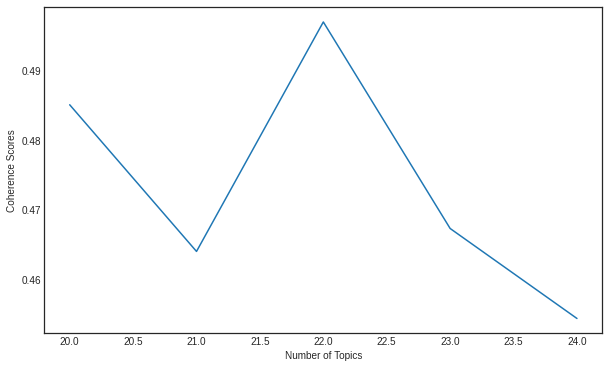

In [12]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = [int(i) for i in range(min_topics,max_topics)]

plt.figure(figsize=(10,6))
plt.plot(x, coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Scores')
plt.show()

In [13]:
lsi_model = LsiModel(corpus, num_topics=24, id2word=dictionary)
topics = lsi_model.print_topics(num_topics=24)
topics

[(0,
  '0.994*"max" + 0.069*"giz" + 0.068*"bhj" + 0.025*"qax" + 0.015*"biz" + 0.014*"nrhj" + 0.014*"bxn" + 0.012*"nui" + 0.011*"ghj" + 0.011*"zei"'),
 (1,
  '0.381*"file" + 0.193*"program" + 0.169*"edu" + 0.162*"imag" + 0.130*"avail" + 0.126*"output" + 0.119*"includ" + 0.115*"inform" + 0.101*"pub" + 0.100*"time"'),
 (2,
  '-0.408*"file" + -0.335*"output" + -0.216*"entri" + 0.171*"peopl" + 0.153*"know" + -0.137*"onam" + -0.134*"program" + 0.131*"said" + -0.129*"printf" + -0.115*"char"'),
 (3,
  '-0.249*"imag" + -0.226*"edu" + 0.214*"output" + 0.165*"peopl" + 0.157*"know" + 0.155*"entri" + 0.153*"said" + -0.153*"avail" + -0.142*"jpeg" + -0.124*"pub"'),
 (4,
  '-0.549*"wire" + -0.223*"ground" + 0.214*"jpeg" + 0.213*"file" + 0.169*"imag" + -0.164*"circuit" + -0.157*"outlet" + -0.139*"connect" + -0.129*"subject" + -0.126*"neutral"'),
 (5,
  '-0.400*"jpeg" + -0.345*"imag" + 0.276*"anonym" + -0.246*"wire" + 0.160*"privaci" + 0.156*"internet" + -0.151*"color" + 0.144*"post" + 0.125*"inform" + 

### 잠재 디리클레 할당을 위한 `LdaModel`

In [14]:
from gensim.models import LdaModel
lda_model = LdaModel(corpus,num_topics=20, id2word=dictionary)
topics = lda_model.print_topics()
topics

[(0,
  '0.011*"govern" + 0.008*"peopl" + 0.008*"encrypt" + 0.008*"right" + 0.008*"chip" + 0.008*"clipper" + 0.007*"secur" + 0.007*"state" + 0.005*"law" + 0.005*"public"'),
 (1,
  '0.007*"state" + 0.006*"year" + 0.006*"rate" + 0.006*"time" + 0.006*"health" + 0.005*"report" + 0.005*"like" + 0.004*"tobacco" + 0.004*"point" + 0.004*"peopl"'),
 (2,
  '0.009*"card" + 0.009*"work" + 0.008*"disk" + 0.007*"need" + 0.007*"drive" + 0.007*"softwar" + 0.006*"bit" + 0.006*"problem" + 0.006*"like" + 0.006*"thank"'),
 (3,
  '0.209*"max" + 0.023*"giz" + 0.019*"bhj" + 0.016*"bxn" + 0.008*"qax" + 0.005*"nrhj" + 0.005*"nui" + 0.005*"chz" + 0.004*"fij" + 0.004*"biz"'),
 (4,
  '0.011*"mail" + 0.010*"post" + 0.010*"edu" + 0.009*"kei" + 0.007*"inform" + 0.006*"messag" + 0.006*"ripem" + 0.006*"com" + 0.006*"public" + 0.005*"user"'),
 (5,
  '0.014*"peopl" + 0.010*"think" + 0.007*"like" + 0.006*"know" + 0.005*"time" + 0.004*"want" + 0.004*"come" + 0.004*"thing" + 0.004*"year" + 0.004*"govern"'),
 (6,
  '0.008*"w

In [15]:
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics = 20,25
coherence_scores = []

for num_topics in range(min_topics,max_topics):
  model = LsiModel(corpus, num_topics=num_topics,id2word=dictionary)
  coherence = CoherenceModel(model = model,
                             texts=news_texts,
                             dictionary=dictionary)
  coherence_scores.append(coherence.get_coherence())
print(coherence_scores)

[0.46327266306460907, 0.48015402938867635, 0.4620045023134507, 0.4710512948566233, 0.47481278827897255]


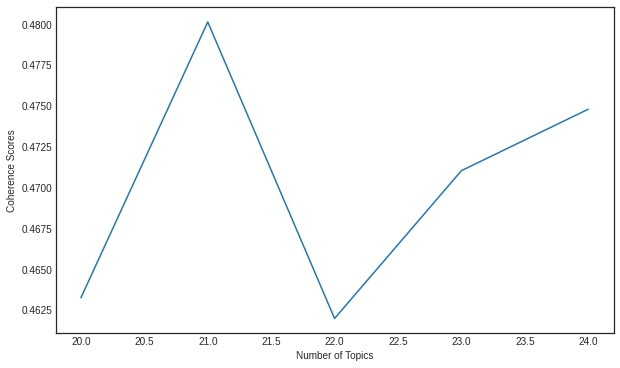

In [16]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = [int(i) for i in range(min_topics,max_topics)]

plt.figure(figsize=(10,6))
plt.plot(x, coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Scores')
plt.show()

In [17]:
lda_model = LdaModel(corpus,num_topics=23,id2word=dictionary)
topics = lda_model.print_topics(num_topics)
topics

[(0,
  '0.174*"max" + 0.019*"giz" + 0.015*"bhj" + 0.013*"bxn" + 0.006*"qax" + 0.005*"lib" + 0.004*"nrhj" + 0.004*"color" + 0.004*"nui" + 0.004*"biz"'),
 (1,
  '0.016*"greek" + 0.009*"univers" + 0.008*"turkish" + 0.007*"turk" + 0.005*"nazi" + 0.005*"german" + 0.005*"histori" + 0.005*"state" + 0.005*"greec" + 0.004*"year"'),
 (2,
  '0.014*"israel" + 0.013*"state" + 0.013*"jew" + 0.010*"isra" + 0.008*"arab" + 0.006*"islam" + 0.005*"jewish" + 0.005*"peopl" + 0.005*"countri" + 0.005*"palestinian"'),
 (3,
  '0.005*"plastic" + 0.004*"space" + 0.004*"launch" + 0.003*"motorcycl" + 0.003*"beam" + 0.002*"nasa" + 0.002*"kent" + 0.002*"appletalk" + 0.002*"satellit" + 0.002*"tonga"'),
 (4,
  '0.029*"drive" + 0.010*"col" + 0.010*"disk" + 0.008*"food" + 0.006*"like" + 0.006*"hard" + 0.005*"look" + 0.004*"plane" + 0.004*"auto" + 0.004*"know"'),
 (5,
  '0.012*"peopl" + 0.010*"christian" + 0.008*"think" + 0.008*"believ" + 0.008*"know" + 0.007*"jesu" + 0.006*"mean" + 0.006*"god" + 0.005*"time" + 0.005*"th

## 토픽 모델링 시각화

In [18]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=32421a863664d45fb17dc195517bb62169c51ce4997b838982cc6c8a1c252f9f
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [21]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus,dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
